# Exploring regression models in sklearn

## Overview

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [2]:
df = pd.DataFrame(
    {
        "category": ["a", "a", "b", "b"],
        "numeric": [4, 6, 100, 132],
        "target": [12, 24, 360, 420],
    }
)

In [3]:
df

,category,numeric,target
0,a,4,12
1,a,6,24
2,b,100,360
3,b,132,420


Plotting with pandas:

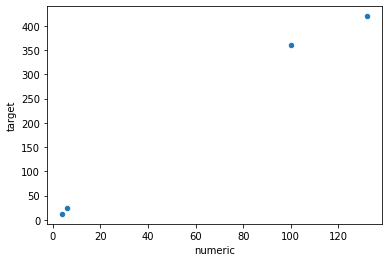

In [4]:
df.plot(x="numeric", y="target", kind="scatter")
plt.show()

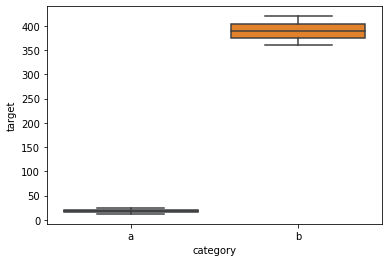

In [5]:
sns.boxplot(data=df, x="category", y="target")
plt.show()

Plotting with mpl:

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


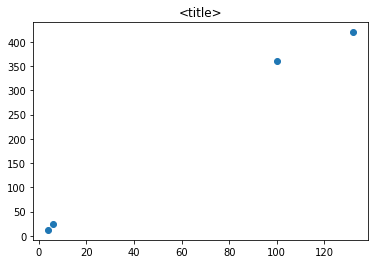

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.numeric, df.target, label="series_01")
ax.set_title("<title>")
fig.show()

## Models

In [7]:
m = LinearRegression()
m2 = Lasso()
m3 = LassoCV()

In [8]:
models = {
    "lm": m,
    "lasso": m2,
    # 'lassoCV': m3
}

## Fitting with only categorical variable

In [ ]:
X = pd.get_dummies(df["category"])
y = df["target"]

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X, y)
    coeffs = model.coef_
    train_preds = model.predict(X)
    errors = y.values - train_preds
    results[f"{model_name}"] = {
        'coeffs': coeffs,
        'train_preds': train_preds,
        'errors': errors
    }

Check that linear regression on categorical var will result in just<br>
predicting the category mean in each case.

In [ ]:
group_means = df.groupby("category")["target"].mean().tolist()
for pred in results['lm']['train_preds']:
    assert round(pred, 0).astype(int) in group_means